# EXAMEN PROGRAMACIÓN

# ALAN RAMON FIGUEROA GALAZ

In [1]:
import glob
import numpy as np
import matplotlib.pyplot
import pandas as pd

In [4]:
filename = 'covid-data/200511COVID19MEXICO.csv'

In [5]:
data = pd.read_csv(filename, encoding= 'unicode_escape')

In [9]:
#Visualizar las variables y datos
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-11,07f569,2,3,27,2,27,27,4,1,...,1,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-05-11,0b0e89,2,3,25,2,25,25,6,2,...,2,2,2,1,2,1,99,MÃ©xico,99,2
2,2020-05-11,0ecd46,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,2020-05-11,12eb62,2,3,25,1,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
4,2020-05-11,032c9a,2,3,25,2,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


# 2. Generar una tabla con 3 columnas:

In [18]:
#Considerar los casos en Sonora
sonora = data.loc[:, 'ENTIDAD_UM']==26
datos_sonora = data.loc[sonora]
datos_sonora.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
335,2020-05-11,043561,2,4,26,2,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
956,2020-05-11,1999a7,2,4,26,2,26,26,55,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
1045,2020-05-11,1e70bd,2,4,26,2,25,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1160,2020-05-11,07b5a7,2,4,26,1,26,26,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
1288,2020-05-11,1b9ce4,2,4,26,1,26,26,33,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97


In [19]:
#Eligiendo las 3 columnas a utilizar
tabla1 = datos_sonora.iloc[:,[10,11,12]]
tabla1.head()

,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF
335,2020-04-14,2020-04-06,9999-99-99
956,2020-04-10,2020-04-06,9999-99-99
1045,2020-04-20,2020-04-14,9999-99-99
1160,2020-04-08,2020-04-02,9999-99-99
1288,2020-04-07,2020-04-06,9999-99-99


In [20]:
#Quitar los datos de fecha de Defunción que aun no se han confirmado
tabla1 = tabla1.drop(tabla1[tabla1['FECHA_DEF']== '9999-99-99'].index)
tabla1.head()

,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF
1751,2020-04-02,2020-03-30,2020-04-08
2185,2020-04-13,2020-04-13,2020-04-21
2818,2020-04-21,2020-04-14,2020-04-29
2995,2020-04-15,2020-04-11,2020-04-15
5188,2020-04-30,2020-04-30,2020-05-07


In [21]:
#Exportar la tabla a archivo CSV
tabla1.to_csv('tabla1.csv')

# 3. Generar una tabla con la cantidad de casos hospitalizados en los estados de Sonora, Chihuahua, Nuevo León y Puebla.

In [27]:
#Considerar los casos en Sonora, Chihuahua, Nuevo León y Puebla
datos = pd.DataFrame(data)
estados = datos.query('ENTIDAD_UM == (8,19,21,26)')[['ENTIDAD_UM']]
estados.head()

,ENTIDAD_UM
76,19
82,21
83,21
143,19
159,21


In [30]:
estados.replace(to_replace =(8,19,21,26),  
                            value =['Chihuahua','Nuevo Leon', 'Puebla', 'Sonora'])

,ENTIDAD_UM
76,Nuevo Leon
82,Puebla
83,Puebla
143,Nuevo Leon
159,Puebla
...,...
135094,Puebla
135097,Nuevo Leon
135101,Nuevo Leon
135103,Nuevo Leon


In [31]:
estados = datos.query('ENTIDAD_UM == (8,19,21,26)')[['ENTIDAD_UM']].reset_index()
estados.head()

,index,ENTIDAD_UM
0,76,19
1,82,21
2,83,21
3,143,19
4,159,21


In [34]:
tabla2 = pd.DataFrame(estados.replace(to_replace =(8,19,21,26),  
                            value =['Chihuahua','Nuevo Leon', 'Puebla', 'Sonora']))

In [35]:
tabla2 = pd.DataFrame(tabla2.groupby(['ENTIDAD_UM']).size())
tabla2=tabla2.rename(columns = {0: 'Casos Hospitalizados'}).reset_index()
tabla2.head()

,ENTIDAD_UM,Casos Hospitalizados
0,Chihuahua,2116
1,Nuevo Leon,7926
2,Puebla,3405
3,Sonora,2174


In [37]:
tabla2.to_csv('tabla2.csv')

# Gráfico Casos Hospitalizados Estados

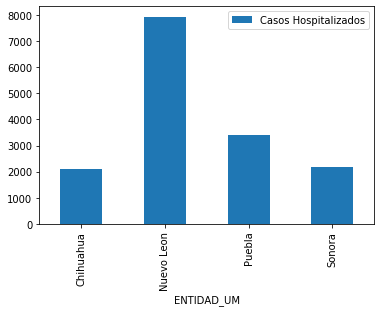

In [42]:
plt = tabla2.plot.bar(x='ENTIDAD_UM', y='Casos Hospitalizados')

# SERIE DE TIEMPO NIVEL NACIONAL

In [43]:
datos2 = pd.DataFrame(data.groupby(['FECHA_INGRESO']).size())
datos2.head()

,0
FECHA_INGRESO,
2020-01-01,5
2020-01-02,16
2020-01-03,18
2020-01-04,6
2020-01-05,14


In [44]:
datos2=datos2.rename(columns = {0: 'Casos Confirmados'}).reset_index()
datos2.head()

,FECHA_INGRESO,Casos Confirmados
0,2020-01-01,5
1,2020-01-02,16
2,2020-01-03,18
3,2020-01-04,6
4,2020-01-05,14


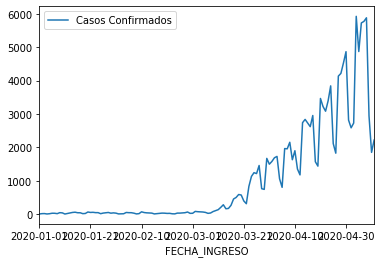

In [45]:
plt = datos2.plot.line(x='FECHA_INGRESO', y='Casos Confirmados')